<a href="https://colab.research.google.com/github/jo5382/image-classification/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn import svm
import os
from skimage.transform import resize  #to resize the image
from skimage.io import imread # to read image
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
os.listdir("/content/drive/MyDrive/kvasir-dataset")

['normal-cecum',
 'dyed-resection-margins',
 'ulcerative-colitis',
 'esophagitis',
 'dyed-lifted-polyps',
 'polyps',
 'normal-z-line',
 'normal-pylorus']

In [ ]:
len(os.listdir('/content/drive/MyDrive/kvasir-dataset'))

8

In [ ]:
path=os.path.join("/content/drive/MyDrive/kvasir-dataset",'ulcerative-colitis')
for img in os.listdir(path):
  print(img)

0708777f-ebec-4291-9981-98f276ae168b.jpg
27f8a230-2d6d-4a89-a77e-58f840878123.jpg
518f121f-541d-4bc3-9f69-09b9e9a70109.jpg
46a1688e-14b2-41f9-9990-ce999bc34aa1.jpg
1877db92-3921-42c6-8db7-e45e3c41cdbb.jpg
4f532c70-a197-41fa-8bd1-67d711967220.jpg
087b94a6-2b59-40ee-bf4b-0335065b395f.jpg
524d6f3f-b8de-4083-9590-7bf6514cfd02.jpg
4e228bcd-b23f-40fc-86b3-46ce3bbeeac2.jpg
1f323222-2c12-4c08-9042-dcb52f7a7bd2.jpg
38bb8fe4-bb68-43fc-843a-7b7a57a44fed.jpg
1345041f-914b-4033-b213-f4507d9b569c.jpg
5535dbed-1db3-42d2-ac7f-2161a5718eab.jpg
34f62ec8-9a0e-453c-8ad2-7214109a56f5.jpg
075dfe26-db38-4b75-8771-501a93a9ae83.jpg
45b5dad4-c0e0-4d60-a07f-7ec93853c60b.jpg
55cc5ece-3ce9-4245-850d-c5e0074ee299.jpg
1fd0b100-f61b-421a-aadc-30a5e05662bb.jpg
3609b909-b6ad-4a25-a317-70e27099e45a.jpg
37f3236b-3a58-49e8-878b-1dc5b59afa11.jpg
19c02ca0-f26f-4360-95b9-4316ba9adb87.jpg
0450df79-728e-47f7-b7d7-5a32e40b686e.jpg
38ccd5a8-d2c9-440c-9495-747895987769.jpg
0905763a-046f-492c-8dcb-f43fb1042872.jpg
3008b8ba-5905-4c

In [ ]:
polyppath=os.path.join('/content/drive/MyDrive/kvasir-dataset','polyps')
for img in os.listdir(polyppath):
  print(img)

0efad162-7fd8-472e-ab4f-c5ed8a7569b4.jpg
0e249f6c-8d96-4f17-87a3-128e98308ea8.jpg
0e74bf79-f9e9-4f6f-afe9-b5c8789a12ea.jpg
0bef2e62-ebbb-4a07-b7fc-763b585fe039.jpg
0a994cfe-761c-4d53-ad76-668927ccd347.jpg
1787964a-0208-44fb-abb3-cded2b86625e.jpg
0b8ccb81-1786-4a67-b6d0-f42454f7a730.jpg
11ad2a58-e96d-4cd4-b3af-d18ead3547c7.jpg
17fb3a39-4581-454d-a91d-f7f45b8fb45f.jpg
0589644e-cdb7-413a-8ea0-c26ff26707c9.jpg
0c433e1d-4f44-4ca4-bd66-4cf248100198.jpg
12efbc82-6ef3-483e-a657-5c3724bd4a56.jpg
08afaf00-7cae-4c91-a88e-70aaa0034de9.jpg
0a945a01-470c-4834-9360-6569a4a43610.jpg
0e8465c5-ed1d-48bb-8dc8-e9b2ad933210.jpg
14d8cb7b-e44c-4367-9cea-ecbbd346f658.jpg
0c9881d2-f21d-4fa2-a003-616b86d3c704.jpg
0bfd9122-42e0-47eb-8c48-2f60b91f017d.jpg
11a4d694-570a-44b0-893a-04ff92141912.jpg
0893f8ec-7929-4e69-9c1f-8b349924304e.jpg
116c1e37-65f8-4205-b220-48ad583dfd3d.jpg
0f776c8b-039b-4748-8229-8ed9f78e6200.jpg
0e45e027-bdcf-4ca4-9b12-d9e2bc00245a.jpg
0e68fc5b-beaa-4607-a13a-f6db84121c78.jpg
05818813-ec10-42

In [ ]:
normalcecumpath=os.path.join("/content/drive/MyDrive/kvasir-dataset",'normal-cecum')
for img in os.listdir(normalcecumpath):
  print(img)

0b987b88-9c1b-41f6-b54e-9536480312a5.jpg
00f3d2cc-93ea-40f0-9b88-b159b07a49cb.jpg
0c8c6bb6-3b70-4a88-80d8-6c46fc129c30.jpg
0d4d1e3d-c588-4cc0-9e3b-e30c0164f630.jpg
01af3454-037f-4708-b73c-6ec4423b6a61.jpg
022ba669-9ab2-4703-8f9c-c7d07f31d89f.jpg
0c9ae570-1bb9-44ee-96db-11deabcc791e.jpg
054e55fd-2656-4b60-92f2-e8d3f6885e69.jpg
0d3d3ca3-4d84-4ee0-969f-496f81cca359.jpg
0d452625-bd76-4a9e-9c75-42f9604a173c.jpg
04a4bc9f-63a8-45f5-afb8-0c3f9df1c51b.jpg
0cf8e803-870d-40a1-8e8a-8c4ded51561e.jpg
0233c35c-0bfd-4105-9756-7701de5f4901.jpg
02a01c8d-30e9-444a-a57c-11ecb385e5b4.jpg
0163b3a2-9aa1-4b23-a9a8-aff07a738f16.jpg
0a779eab-7b2e-4807-a8b2-cd685c55611a.jpg
05d46164-a485-4e6d-8ae7-c73dab014b91.jpg
09b7c1b5-b9b4-45d8-8ea5-72bef4ab037a.jpg
046ea931-dfd4-477b-8d9d-f6e892681166.jpg
0a4ef674-6ccd-4b26-a8e0-a8d7e3f2f6be.jpg
0db6d3b2-52ca-493c-aed2-040695867805.jpg
03adaef7-3900-4624-9ffa-6df25d1ee70c.jpg
04d8ae41-0d9c-4994-b6ff-2466bccae84c.jpg
098f555a-e437-4dee-b3e1-f7344f9060e5.jpg
01bddb73-9c5d-4a

In [ ]:
dyedresectionmarginspath=os.path.join("/content/drive/MyDrive/kvasir-dataset",'dyed-resection-margins')
for img in os.listdir(dyedresectionmarginspath):
  print(img)

1949cce8-5ab4-4102-baa1-370e2941cd56.jpg
08ce23d1-549a-4b7c-80c9-8dca8f4b5d99.jpg
16fb48a4-7dde-41df-aa3a-a8a73de0e047.jpg
08ed9543-eeec-4523-a81d-e3a7547183b2.jpg
18c6ae85-f3f9-4c5f-a318-51f67f5eb009.jpg
2d5efac0-6b60-472c-a9a6-8a895385462c.jpg
1d423f77-a9ec-4964-bf35-c1f06ba68e4d.jpg
0a65efe3-c779-468b-9668-699090ab8b74.jpg
3732c820-1922-4d8a-a6bf-c6b3b66ce2c8.jpg
2a2592fc-4557-4276-8c96-d7ac1ee49d37.jpg
16ce4c26-8983-46cc-be67-43f809211334.jpg
214668dc-3cd5-4a50-9054-fdf04360aed1.jpg
088b80c8-0ad8-4c2d-971e-6a400027c623.jpg
2f2dfbd2-adea-4947-8b2b-5471ec4d06e6.jpg
2a38ed92-ab6d-4843-ac20-f9002ed39395.jpg
12d2689e-0215-4899-83aa-f8d6794b4990.jpg
1a0744b2-290b-49e0-a5cc-9fd2083eae4d.jpg
07a97952-28dc-4aec-8a52-c9f5395e99e3.jpg
2022a0e0-9529-4f9f-8796-05d549724550.jpg
3449dba7-8929-4b1e-9e07-c6034cd470af.jpg
2cc68fd5-0a01-45c2-a4ad-65a1c87a2164.jpg
0bd00d23-3970-4965-87dc-29526ff5080b.jpg
30d31653-f9fe-42bc-9746-d92e71b4b675.jpg
1b9a33e2-1643-47eb-857a-5e9764bb9112.jpg
033bd4de-dc55-45

In [ ]:
esophagitispath=os.path.join("/content/drive/MyDrive/kvasir-dataset",'esophagitis')
for img in os.listdir(esophagitispath):
  print(img)

022b40a7-a36f-4510-95a1-b6bb709e94ed.jpg
01f092a2-fccb-49f6-af06-8351c8bb47f1.jpg
00687a70-bbad-4bf9-864f-9f7b3c27a2c8.jpg
02b1d319-dea6-418b-969a-c588585cb4f2.jpg
0134d93d-0922-4063-9acd-a4177f2b0c07.jpg
01a57b1a-780f-4e52-9f94-291c2982154d.jpg
001fb927-4814-4ba5-851d-189db99291d8.jpg
02de4b4c-8704-45f7-b90f-6004d76bdded.jpg
170708d1-58c7-4b37-b20b-bc78203f4593.jpg
099c90f2-63d8-4648-a56b-777edf1db178.jpg
1ce3f236-f169-4fde-895b-b71d163b25d9.jpg
172d405f-bced-4502-99c9-e50029244a8f.jpg
10b9522f-f3d7-40c0-bfff-c82f2228850a.jpg
1bcc6ea1-e7c7-4fd7-8267-a7b3db522e5b.jpg
0e462695-39fd-45af-b520-fa040e855c48.jpg
17e2a780-7946-4cd5-8400-492d08b3ccea.jpg
0e26859d-d9fe-4c93-a34e-338882ed50af.jpg
0e0fae29-2b15-4dc2-aa4f-ed8b9e045c3f.jpg
19550c07-0861-4c6e-b81b-261201b242bd.jpg
1bd6f3ca-3fa5-4f56-8978-a9e961d8f0e4.jpg
191715a7-bbf3-4c4a-a972-25a527fdda70.jpg
049a6372-b157-4ccc-88fe-31be260195c5.jpg
146d0bd0-7549-448d-b96a-08670cc94328.jpg
170763a3-2afb-40cc-83dd-4f631dad4e6d.jpg
1ed3011a-0fb0-4f

In [ ]:
dyedliftedpolypspath=os.path.join("/content/drive/MyDrive/kvasir-dataset",'dyed-lifted-polyps')
for img in os.listdir(dyedliftedpolypspath):
  print(img)

0ad65fea-9e8e-4410-a943-dbb6b94107b1.jpg
07b4807f-5d4c-4e08-8629-6095f5b86df1.jpg
131bed9f-da09-4ffb-b7c5-e3a59d59e33d.jpg
0b815392-cf2f-458b-b22d-c4ae2927df8b.jpg
192da57a-cb2f-4a75-acb4-a34f9af10c4c.jpg
13f0a798-fa5c-43b5-8d0f-8835930aaca3.jpg
031a6e89-d3b7-48c8-8e2f-db991030f959.jpg
1547239e-0bf2-4798-9260-15978990bad5.jpg
0a447c72-3a6f-43ac-a236-ca588f0435d4.jpg
0ba205b3-9c23-4d95-9d46-624a550c48be.jpg
1950947d-bce3-4979-b669-d28904eaaaaa.jpg
162ede68-ee27-4a85-8658-c1bc9bac11f6.jpg
08509852-29f4-452c-a4a6-e310edaa852d.jpg
1a97ff49-0725-4037-b533-5e1e44be3dfd.jpg
0d99e0d7-02a9-4578-aab1-1460b2446ba5.jpg
0f373f61-d7d5-4e6b-b6a4-ff5ba33ba62b.jpg
06976210-ea7b-4b39-8719-872997278dd6.jpg
1095b496-3ccc-4758-8429-fb85c59baf45.jpg
0626da74-5a42-4f55-9557-b2141dc79759.jpg
1392de5a-9a8d-4400-9236-d4734d9ebd2c.jpg
14177494-4eda-4ee2-ba8a-0ffe6033d4e3.jpg
095d7ff1-e397-4bfb-978d-83a9d3f20d40.jpg
00cf9508-6ad1-4db9-840a-519c1d515c30.jpg
041daea7-c9cd-43f9-ae77-b8ecb694a6a2.jpg
144e9e19-2ffd-4f

In [ ]:
normalzlinepath=os.path.join("/content/drive/MyDrive/kvasir-dataset",'normal-z-line')
for img in os.listdir(normalzlinepath):
  print(img)

0ca920c9-acc9-4be9-83ee-9d987adac7f3.jpg
00bee375-36d2-4ba9-89e5-bd6132d79c0c.jpg
01c1453c-dcad-4e16-a0d5-645e833ce82c.jpg
097f09c8-c8b5-4f9d-b4d7-2adf2d2ec381.jpg
0e49eb93-37e1-40f4-8954-7763913bb413.jpg
02896af8-ebb2-4ed0-94dd-6a76fbf7f00b.jpg
0dc5db22-853d-4b96-84c5-7ee482d119fc.jpg
0c020c03-da6c-46ec-bc00-09564351e63a.jpg
016858b4-36f8-47d7-97ca-1570bcaba413.jpg
0b55fa7f-8271-4c50-8df4-6d228336a21b.jpg
08cf6964-9189-4b0b-8409-02fda37c7034.jpg
09a1e1ed-bdbb-4535-bd83-cdd28e26d5ee.jpg
0d2f4ef2-21e8-4a09-bbc3-2f31c99d1e20.jpg
0be91a4e-be3d-4c06-92d7-6e0ee417f55a.jpg
01a146ce-c9a3-42af-9f53-573e90975abe.jpg
07fb76fd-2986-416a-974d-02e78d750cde.jpg
09d74a84-f04c-4a95-9773-cf0716eb33a2.jpg
03be9506-bf4a-42e5-b18b-ec8388860fae.jpg
0be5bfcb-ea00-4c03-8dee-a8bc26b74bd2.jpg
0a3d11f8-f994-4b2b-9fb1-57e4e346861f.jpg
07aa47ce-3a72-4103-9b12-9e79acb737ba.jpg
0dfa0680-c187-41d2-a81d-6e8ea7d3ebc8.jpg
032d6b45-f706-444d-b4d9-c11a4df4d364.jpg
0b874510-8855-4c23-9caf-37c22dfabe6a.jpg
0d78c123-b659-49

In [ ]:
normalpyloruspath=os.path.join("/content/drive/MyDrive/kvasir-dataset",'normal-pylorus')
for img in os.listdir(normalpyloruspath):
  print(img)

005959d0-b75b-41ed-8da1-2a5d0666d612.jpg
0b8878b5-cd52-48d4-9ea8-f384edbc0d3e.jpg
08db2b1b-3c6b-4275-8c97-a7067c649915.jpg
0b917df8-8d7a-4349-9c2e-eec9a20a8893.jpg
06b0c8b1-e56d-44f5-82b0-6eda4d720a68.jpg
0c514455-5ad0-4f89-9622-e85f5e04c434.jpg
0aa2e5c7-f32c-416c-920c-3504f1438ee1.jpg
0301983f-0196-45ff-b376-0faa61d551e6.jpg
02e55fb2-8a74-4671-95a9-81a97e9a6210.jpg
09e09fc9-f91d-47b6-a54a-2cd1b1b60452.jpg
0436844e-5ff7-409a-b7cd-41c23be0fd28.jpg
05b22295-3cdd-4eb0-b4d8-09a501a41c8c.jpg
0b08df09-8f8e-49e5-9b5d-9daedd37760b.jpg
0b8b198e-a553-4357-a766-6184cb7583f1.jpg
0be09646-f39c-4f3a-932b-db971c569e45.jpg
026715f1-d01e-47c7-ae95-93b46695a7e8.jpg
089feb98-72ee-4e4b-b90f-661cc7594fff.jpg
073564b0-bfb5-4fc1-88d1-c0b330388dc6.jpg
0811380d-efbb-4bff-8ab2-95bd7fb12945.jpg
03cb8aef-798e-443e-a407-ebccd0a652aa.jpg
0a613579-3062-405e-b6c2-10fd9c46226c.jpg
0bb76fed-8f5d-4df6-bb80-5072bcca9fca.jpg
0a0ce428-e7ee-4a42-9e60-b58b7cb6a06f.jpg
0ab6f797-f0d2-4779-8546-c6d5baab2da0.jpg
0aed7a5a-8da7-46

In [ ]:
flat_data_arr=[]
target_arr=[]
categories=['ulcerative-colitis','polyps','normal-pylorus','normal-cecum','dyed-resection-margins','esophagitis','dyed-lifted-polyps','normal-z-line']
datadir='/content/drive/MyDrive/kvasir-dataset'


In [ ]:
for i in categories:
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resize=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resize.flatten())
    target_arr.append(categories.index(i))


In [ ]:
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.012935,0.015906,0.014419,0.016160,0.016189,0.015676,0.016545,0.016545,0.015139,0.017083,...,4.384766e-03,0.004868,0.005843,0.005319,0.006061,0.006062,0.005888,0.002569,0.002569,0.002534
1,0.015737,0.015737,0.010932,0.018889,0.018889,0.018771,0.019080,0.019080,0.019080,0.018459,...,7.803087e-03,0.008749,0.008749,0.008747,0.007514,0.007514,0.007863,0.004758,0.004758,0.006118
2,0.006700,0.006700,0.006692,0.006038,0.006038,0.004341,0.005202,0.005203,0.002536,0.005340,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.015827,0.018798,0.016809,0.017747,0.017776,0.013637,0.018809,0.018809,0.011622,0.018293,...,6.220318e-03,0.007726,0.007832,0.007769,0.006613,0.008143,0.007307,0.003978,0.005699,0.004758
4,0.013284,0.013284,0.013275,0.015627,0.015627,0.014176,0.015634,0.015712,0.014722,0.013966,...,5.264934e-03,0.005608,0.005743,0.005461,0.004338,0.007156,0.005614,0.002460,0.002657,0.002549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4005,0.000003,0.000003,0.000003,0.000666,0.000666,0.000666,0.001910,0.001910,0.001910,0.001448,...,9.247755e-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4006,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,...,7.450980e-02,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510
4007,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,...,7.450980e-02,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510
4008,0.581631,0.366395,0.370210,0.598213,0.369090,0.372866,0.585569,0.384066,0.324562,0.583058,...,5.243445e-01,0.836436,0.583881,0.565310,0.862213,0.602410,0.579877,0.880869,0.636279,0.578836


In [ ]:
df['Target']=target
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.012935,0.015906,0.014419,0.016160,0.016189,0.015676,0.016545,0.016545,0.015139,0.017083,...,0.004868,0.005843,0.005319,0.006061,0.006062,0.005888,0.002569,0.002569,0.002534,0
1,0.015737,0.015737,0.010932,0.018889,0.018889,0.018771,0.019080,0.019080,0.019080,0.018459,...,0.008749,0.008749,0.008747,0.007514,0.007514,0.007863,0.004758,0.004758,0.006118,0
2,0.006700,0.006700,0.006692,0.006038,0.006038,0.004341,0.005202,0.005203,0.002536,0.005340,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.015827,0.018798,0.016809,0.017747,0.017776,0.013637,0.018809,0.018809,0.011622,0.018293,...,0.007726,0.007832,0.007769,0.006613,0.008143,0.007307,0.003978,0.005699,0.004758,0
4,0.013284,0.013284,0.013275,0.015627,0.015627,0.014176,0.015634,0.015712,0.014722,0.013966,...,0.005608,0.005743,0.005461,0.004338,0.007156,0.005614,0.002460,0.002657,0.002549,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4005,0.000003,0.000003,0.000003,0.000666,0.000666,0.000666,0.001910,0.001910,0.001910,0.001448,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7
4006,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,...,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,7
4007,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,...,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,7
4008,0.581631,0.366395,0.370210,0.598213,0.369090,0.372866,0.585569,0.384066,0.324562,0.583058,...,0.836436,0.583881,0.565310,0.862213,0.602410,0.579877,0.880869,0.636279,0.578836,7


In [ ]:
x=df.iloc[:,:-1]  #input data
y =df.iloc[:, -1]  # Extract the first (and only) column as a Series
   #output data

In [ ]:
print (y)


0       0
1       0
2       0
3       0
4       0
       ..
4005    7
4006    7
4007    7
4008    7
4009    7
Name: Target, Length: 4010, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=50)


In [ ]:

import pandas as pd

y_train_encoded = pd.get_dummies(y_train)

clf=svm.SVC()
clf.fit(x_train,y_train)


SVC()

In [ ]:
y_pred=clf.predict(x_test)
y_pred

array([5, 0, 0, 3, 3, 6, 5, 5, 3, 7, 7, 7, 5, 4, 3, 0, 3, 6, 7, 2, 7, 0,
       7, 1, 1, 0, 0, 5, 0, 6, 2, 6, 5, 7, 4, 4, 7, 7, 6, 0, 2, 7, 5, 3,
       1, 3, 7, 5, 6, 2, 5, 2, 6, 5, 7, 6, 5, 5, 3, 1, 6, 0, 0, 6, 0, 7,
       0, 1, 2, 1, 5, 1, 5, 3, 3, 1, 5, 5, 4, 3, 5, 3, 7, 5, 6, 5, 4, 6,
       1, 1, 4, 0, 5, 7, 0, 7, 5, 0, 6, 2, 0, 2, 1, 3, 7, 4, 7, 0, 4, 0,
       0, 6, 3, 0, 0, 4, 1, 7, 7, 3, 3, 7, 6, 7, 6, 5, 2, 2, 6, 2, 1, 1,
       4, 6, 6, 5, 7, 1, 3, 4, 5, 5, 6, 2, 7, 1, 3, 4, 3, 3, 3, 6, 7, 6,
       5, 7, 2, 4, 4, 3, 6, 2, 7, 7, 4, 7, 0, 3, 4, 2, 3, 1, 3, 4, 6, 3,
       6, 6, 0, 0, 4, 0, 2, 7, 4, 6, 6, 2, 2, 7, 1, 4, 0, 0, 4, 2, 6, 6,
       2, 7, 2, 4, 3, 5, 1, 4, 5, 7, 3, 1, 1, 0, 0, 6, 2, 6, 1, 2, 5, 5,
       1, 2, 1, 7, 4, 6, 0, 0, 1, 2, 0, 1, 1, 7, 6, 7, 7, 5, 4, 6, 2, 3,
       3, 5, 4, 1, 0, 3, 5, 7, 2, 7, 6, 3, 3, 5, 3, 5, 1, 2, 3, 7, 7, 0,
       2, 1, 5, 7, 5, 6, 0, 2, 6, 7, 3, 7, 1, 1, 2, 0, 5, 7, 7, 6, 2, 2,
       5, 6, 5, 5, 0, 0, 5, 1, 0, 4, 1, 7, 2, 7, 3,

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7281795511221946


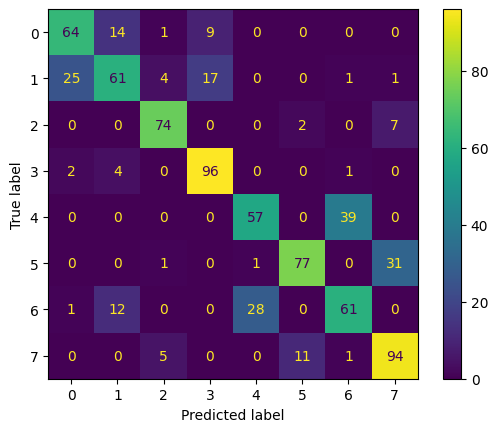

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))